<a href="https://colab.research.google.com/github/RonBartov/Data_Processing/blob/main/factory_data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Factory Data Processing**

# **General Background and Goals**
We have a table called 'factory_test.csv' that contains test data for 51 devices from the population of devices tested in the factory. We are defining the test data as the “**sample group**”.

In addition to the sample group we have a table called 'new_devices.csv' that contains data for 3 additonal devices. We are defining this data as the “**new sample group**”.

### **Main Goal**
Understand the "sample group data" and later to explore and understand the relation of "new sample group" to the "sample group" in terms of probability.

### **Side Goal**
Suggest and implement a method for testng new devices based on our knowledge
of the "sample group" and specify which devices (sample group and new devices) fail the test your tests and why.

# **Data Description**
Both "sample group" and "new sample group" datasets contains the following information:

${\circ}$ 5 **dependent** variables (features) Y1 - Y5.
<br>
${\circ}$ 4 **independent** variables X2 - X5.
<br>
${\circ}$ for i = 2,3,4,5 the feature ${Y_i}$ corresponds to ${X_i}$.
<br>
${\circ}$ The feature ${Y_1}$ has no corresponding variable.

###**Allowed Libraries**
1) Numpy
<br>
2) Pandas
<br>
3) Matplotlib

# **Part by Part**
We will divide this assignment into 5 different sections, each will be focucing on a different task as follows:

${\circ}$ **Section 1-** Data Loading and Description
<br>
${\circ}$ **Section 2-** Data Preprocessing
<br>
${\circ}$ **Section 3-** Data Visualization and Explanaton
<br>
${\circ}$ **Section 4-** Data Exploration
<br>
${\circ}$ **Section 5-** Suggest new testing method
<br>

# **Initial Assumption**
According to the description of the data we can assume that this assignment can be categorized as a "Regression" problem.

Regression analysis is used to predict the value of a variable based on the value of another variable. The variable we want to predict is called the dependent variable (Y in our case) and the variable we are using in order to predict Y's value is called the independent variable, which is X in our case.


###**Using 'Notes'**
In orded to give some clear explenations regarding specific actions or decision we make, we will add a text box with a 'Note' title everytime we would like to explain something.

# **Functions that will be used throughout the assignment**

# **Import Libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# **Section 1- Data Loading and Description**
In this section we will load the data of sample group from 'factory_test.csv' and will provide a description of its contents.

We will present the following properties for the data:

${\circ}$ Data shape
<br>
${\circ}$ Range of values in each feature and variable
<br>
${\circ}$ Data distribution: Mean and variance
<br>
${\circ}$ Check for missing values and if exist, we will replace them with a reasonable value  

In [5]:
# Mount google drive into colab
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
# Loading the sample group data
csv_sample_group_path = r'/content/gdrive/MyDrive/Pulsenmore/factory_test_data.csv'
sample_group = pd.read_csv(csv_sample_group_path)

In [7]:
# Presenting the data frame in order to get initial understanding about the data
sample_group.head()

,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5
0,1491,18,16.8,14,13.33,12,11.12,9,8.33
1,1491,[],[],[],[],[],[],[],[]
2,2004,18,17.94,14,13.99,12,11.72,9,8.65
3,1493,[],[],[],[],[],[],[],[]
4,1497,18,18,14,13.59,12,12.91,9,7.82


In [8]:
# Sample group data frame general information
sample_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Y1      51 non-null     int64 
 1   X2      51 non-null     object
 2   Y2      51 non-null     object
 3   X3      51 non-null     object
 4   Y3      51 non-null     object
 5   X4      51 non-null     object
 6   Y4      51 non-null     object
 7   X5      51 non-null     object
 8   Y5      51 non-null     object
dtypes: int64(1), object(8)
memory usage: 3.7+ KB


In [9]:
# Convert all non numeric values to NaN
sample_group = sample_group.apply(pd.to_numeric, errors='coerce')
sample_group.head()

,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5
0,1491,18.0,16.80,14.0,13.33,12.0,11.12,9.0,8.33
1,1491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004,18.0,17.94,14.0,13.99,12.0,11.72,9.0,8.65
3,1493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1497,18.0,18.00,14.0,13.59,12.0,12.91,9.0,7.82


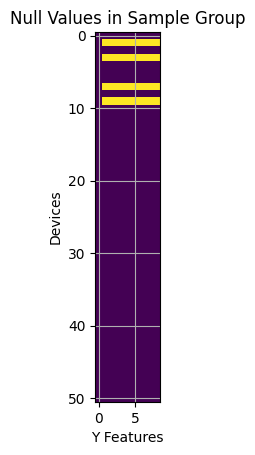

In [10]:
# Present a heat map for the null values in sample group data frame
plt.imshow(sample_group.isnull())
plt.xlabel('Y Features')
plt.ylabel('Devices')
plt.title('Null Values in Sample Group')
plt.grid(True)

In [11]:
# Count the number of null values in each column
count_non_numeric_values = sample_group.isnull().sum()
print(f"Number of non numeric values in each column: \n{count_non_numeric_values}")

Number of non numeric values in each column: 
Y1    0
X2    4
Y2    4
X3    4
Y3    4
X4    4
Y4    4
X5    4
Y5    4
dtype: int64


## **Note #1**
${\circ}$ The data shape is 51x9. Each row represent one of the tested devices while the columns represent the values of the different dependent features ${Y_i \space (i=1,2,3,4,5)}$, and their corresponding independent variables ${X_i \space (i=2,3,4,5)}$.

${\circ}$ Initially the data set contained some non numeric values. From the heatmap plot we can see the areas in the sample group date frame that contains null values, thus it requires some preprocessing before analyzing and visualizing it.

${\circ}$ We can describe the data in the following way:
- ${X_i}$ represent a specific attribute of the device. Each attribute is independent in the other attributes.
- ${Y_i}$ is the value obtained from a specific measurement during the test of the device, while the device has the attribute ${X_i}$
<br>
- Because for each ${i=2,3,4,5}$, ${X_i}$ is a constant, we know that all the 51 devices have the exact same value per attribute, i.e the measurement ${Y_i}$ have been taken from 51 different devices that have the same ${X_i}$.
<br>
${\circ}$ For now it seems that ${Y_1}$ is a feature that contains informaition without any relation to a specific attribute of the device.


# **Section 2- Data Preprocessing**

In this section we will process the sample group data frame before starting to visualize and investigate it.

Here, we will be focusing on the processing in two main aspects:

${\circ}$ **Feature scaling:** Refers to putting the feature values into the same range and it can be done in two ways:

1) Normalization: The feature values are mapped into the [0, 1] range
<br>
2) Standardization: Transform the features to have a mean of 0 and a standard deviation of 1.

Because standardization is more stable for outliers (points that significantly differ from other observations in a dataset), for the sample group data, we will use the Standardization method.
<br>
${\circ}$ **Imputation:** Replacing the missing values in the data with some reasonable values according to the statistics of the non-empty values, such as mean.

In [12]:
# Replace all NaN values with some reasonable value that will maintain each column mean
sample_group_means = sample_group.mean()
for column in sample_group.columns:
    is_nan = pd.to_numeric(sample_group[column]).isnull()
    sample_group.loc[is_nan, column] = sample_group_means[column]

sample_group.head()

,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5
0,1491.0,18.0,16.800000,14.0,13.33000,12.0,11.12000,9.0,8.330000
1,1491.0,18.0,17.425957,14.0,13.45234,12.0,11.67383,9.0,8.346383
2,2004.0,18.0,17.940000,14.0,13.99000,12.0,11.72000,9.0,8.650000
3,1493.0,18.0,17.425957,14.0,13.45234,12.0,11.67383,9.0,8.346383
4,1497.0,18.0,18.000000,14.0,13.59000,12.0,12.91000,9.0,7.820000


In [13]:
# Present the summary statistics for each column
sample_group.describe()

,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5
count,51.000000,51.0,51.000000,51.0,51.00000,51.0,51.000000,51.0,51.000000
mean,1504.960784,18.0,17.425957,14.0,13.45234,12.0,11.673830,9.0,8.346383
std,71.384861,0.0,4.101133,0.0,0.11868,0.0,1.176656,0.0,0.283728
min,1487.000000,18.0,7.870000,14.0,13.19000,12.0,9.100000,9.0,7.810000
25%,1493.000000,18.0,15.455000,14.0,13.40000,12.0,11.070000,9.0,8.210000
50%,1495.000000,18.0,17.425957,14.0,13.45234,12.0,11.540000,9.0,8.340000
75%,1497.000000,18.0,20.180000,14.0,13.51500,12.0,12.350000,9.0,8.505000
max,2004.000000,18.0,25.260000,14.0,13.99000,12.0,14.560000,9.0,9.160000


In [14]:
# Recheck elements type
print(f"Data type of each column: \n{sample_group.dtypes}")

Data type of each column: 
Y1    float64
X2    float64
Y2    float64
X3    float64
Y3    float64
X4    float64
Y4    float64
X5    float64
Y5    float64
dtype: object


In [15]:
# Features scaling according to the standardization method
features_columns = ['Y1', 'Y2', 'Y3', 'Y4', 'Y5']
variables_columns = ['X2', 'X3', 'X4', 'X5']

sample_group_features_means = sample_group[features_columns].mean()
sample_group_features_stds = sample_group[features_columns].std()

# Scale the features with zero mean and variance of 1
scaled_features = (sample_group[features_columns] - sample_group_features_means) / sample_group_features_stds

# Combine the scaled features with the X columns
sample_group = pd.concat([scaled_features, sample_group[variables_columns]], axis=1)

## **Note #2**

${\circ}$ In  each feature column we replaced the empy values with the mean  that calculated based on the other numeric entries.

${\circ}$ We scaled, the data to a zero mean and variance of one, thus we are expecting to see the visualization results on the same scale in the feature axis.

${\circ}$ We will use 'sample_group_features_means' and sample_group_features_std' in the **data exploration** section.

# **Section 3- Data Visualization and Explanation**
In this section we will visualize the data and explain the observed paterns or trends.

In this type of problem, helpful visualizations types can be the following:

1) Scatter plot: Will help us understand the relationship between ${X_i}$ and ${Y_i}$ by plotting **all the points** in our data
<br>
2) Box plot: Will present the distribution for each ${Y_i}$ column.

Because the feature ${Y_1}$ has no corresponding variable ${X_1}$, we will visualize it separately.
<br>
In such a case, it would be **unuseful** to present the scatter plot in respect to some ${X_i}$ (which gives us some information about the correlation between ${Y_1}$ and ${X_i}$), but visualizing the distribution of ${Y_1}$ can help.

Another important thing is that all the features ${Y_i}$ are depend in each other, thus it make sense to create a scatter plots between them.

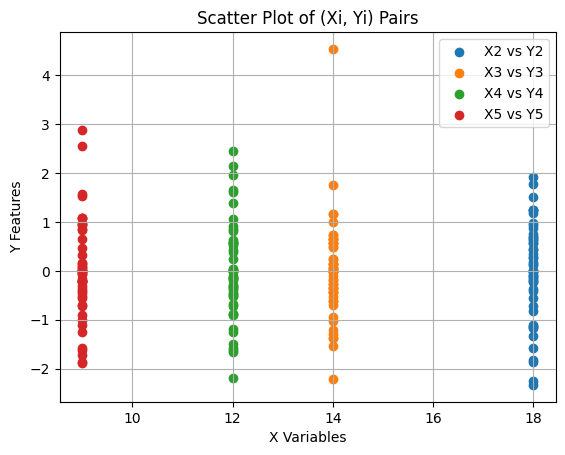

In [16]:
# Scatter plot for features with corresponding variables
for x_col, y_col in zip(variables_columns, features_columns[1:]):
    plt.scatter(sample_group[x_col], sample_group[y_col], label=f'{x_col} vs {y_col}')

plt.xlabel('X Variables')
plt.ylabel('Y Features')
plt.legend()
plt.title('Scatter Plot of (Xi, Yi) Pairs')
plt.grid(True)

plt.show()

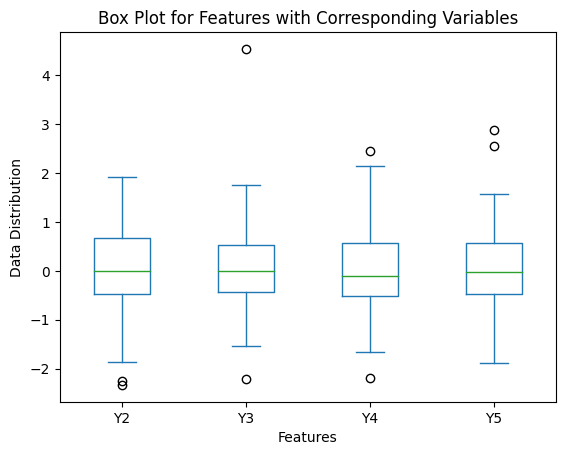

In [17]:
# Box plot for features with corresponding variables
sample_group[features_columns[1:]].plot(kind='box',xlabel='Features', ylabel='Data Distribution', title='Box Plot for Features with Corresponding Variables');

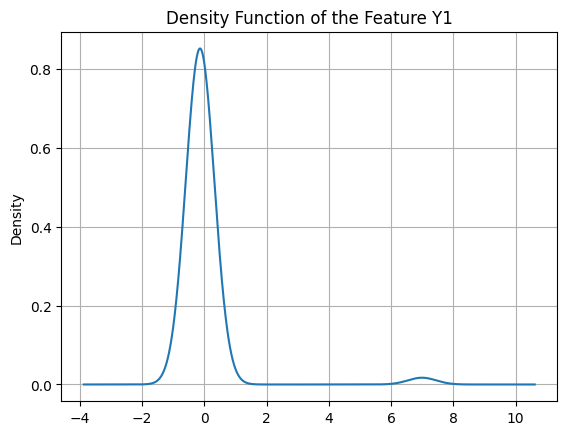

In [18]:
# Density function of the feature Y1
sample_group['Y1'].plot.density(grid=True, xlabel='Y1 Elements Values', title='Density Function of the Feature Y1');

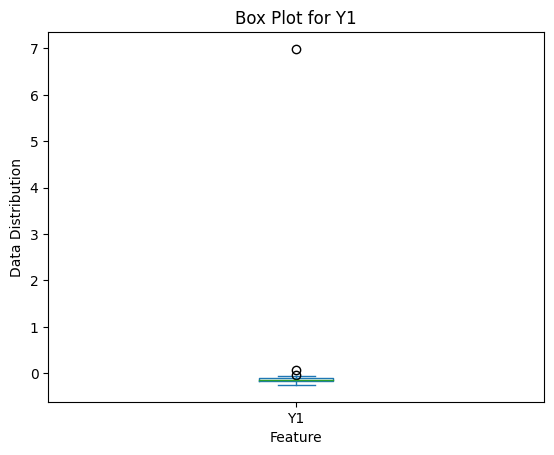

In [19]:
# Box plot for the feature Y1
sample_group['Y1'].plot(kind='box',xlabel='Feature', ylabel='Data Distribution', title='Box Plot for Y1');

In [20]:
# Display the number of elements per value in Y1
sample_group.groupby('Y1').size()

Y1
-0.251605    1
-0.237596    2
-0.195571    7
-0.181562    1
-0.167554    7
-0.153545    5
-0.139536    6
-0.125528    6
-0.111519    5
-0.097511    4
-0.083502    1
-0.069494    2
-0.055485    1
-0.027468    1
 0.070592    1
 6.990827    1
dtype: int64

In [21]:
# Find the number of row that hasthe highest Y1 value
highest_value_in_Y1 = sample_group['Y1'].max()
row_num_with_highest_Y1 = sample_group.loc[sample_group['Y1'] == highest_value_in_Y1].index[0]
print(f' The row with highest value for the feature Y1 in sample_group: {row_num_with_highest_Y1}')

 The row with highest value for the feature Y1 in sample_group: 2


In [22]:
# # Calculating total number of different features pairs according to the Binomial coefficient (choosing 2 out of 5 elements)
# num_of_feature_pairs = 10 # 5!/(5!3!)
# len_features = len(features_columns)

# # Create subplots for all combinations of features
# fig, axes = plt.subplots(len_features, len_features, figsize=(12, 12))
# fig.suptitle("Scatter Plots of Feature Pairs (Covariance)", fontsize=16, y=1.02)

# # Loop over rows and columns for subplots
# plt_row = 0
# plt_col = 0
# for i in range(len_features):
#     for j in range(len_features):

#         # Get the names of the features to be plotted
#         axis_zero_feature = features_columns[i]
#         axis_one_feature = features_columns[j]

#         # Plot the scatter plot of Yi vs Yj
#         axes[i, j].scatter(sample_group[axis_zero_feature], sample_group[axis_one_feature])

#         # Set axis labels and subplot titles
#         axes[i, j].set_xlabel(axis_zero_feature)
#         axes[i, j].set_ylabel(axis_one_feature)

#         plt_col = (plt_col + 1) % len_features
#         if plt_col == 0:
#           plt_row += 1

# # Adjust layout to prevent overlapping of subplots
# plt.tight_layout()

# plt.show()

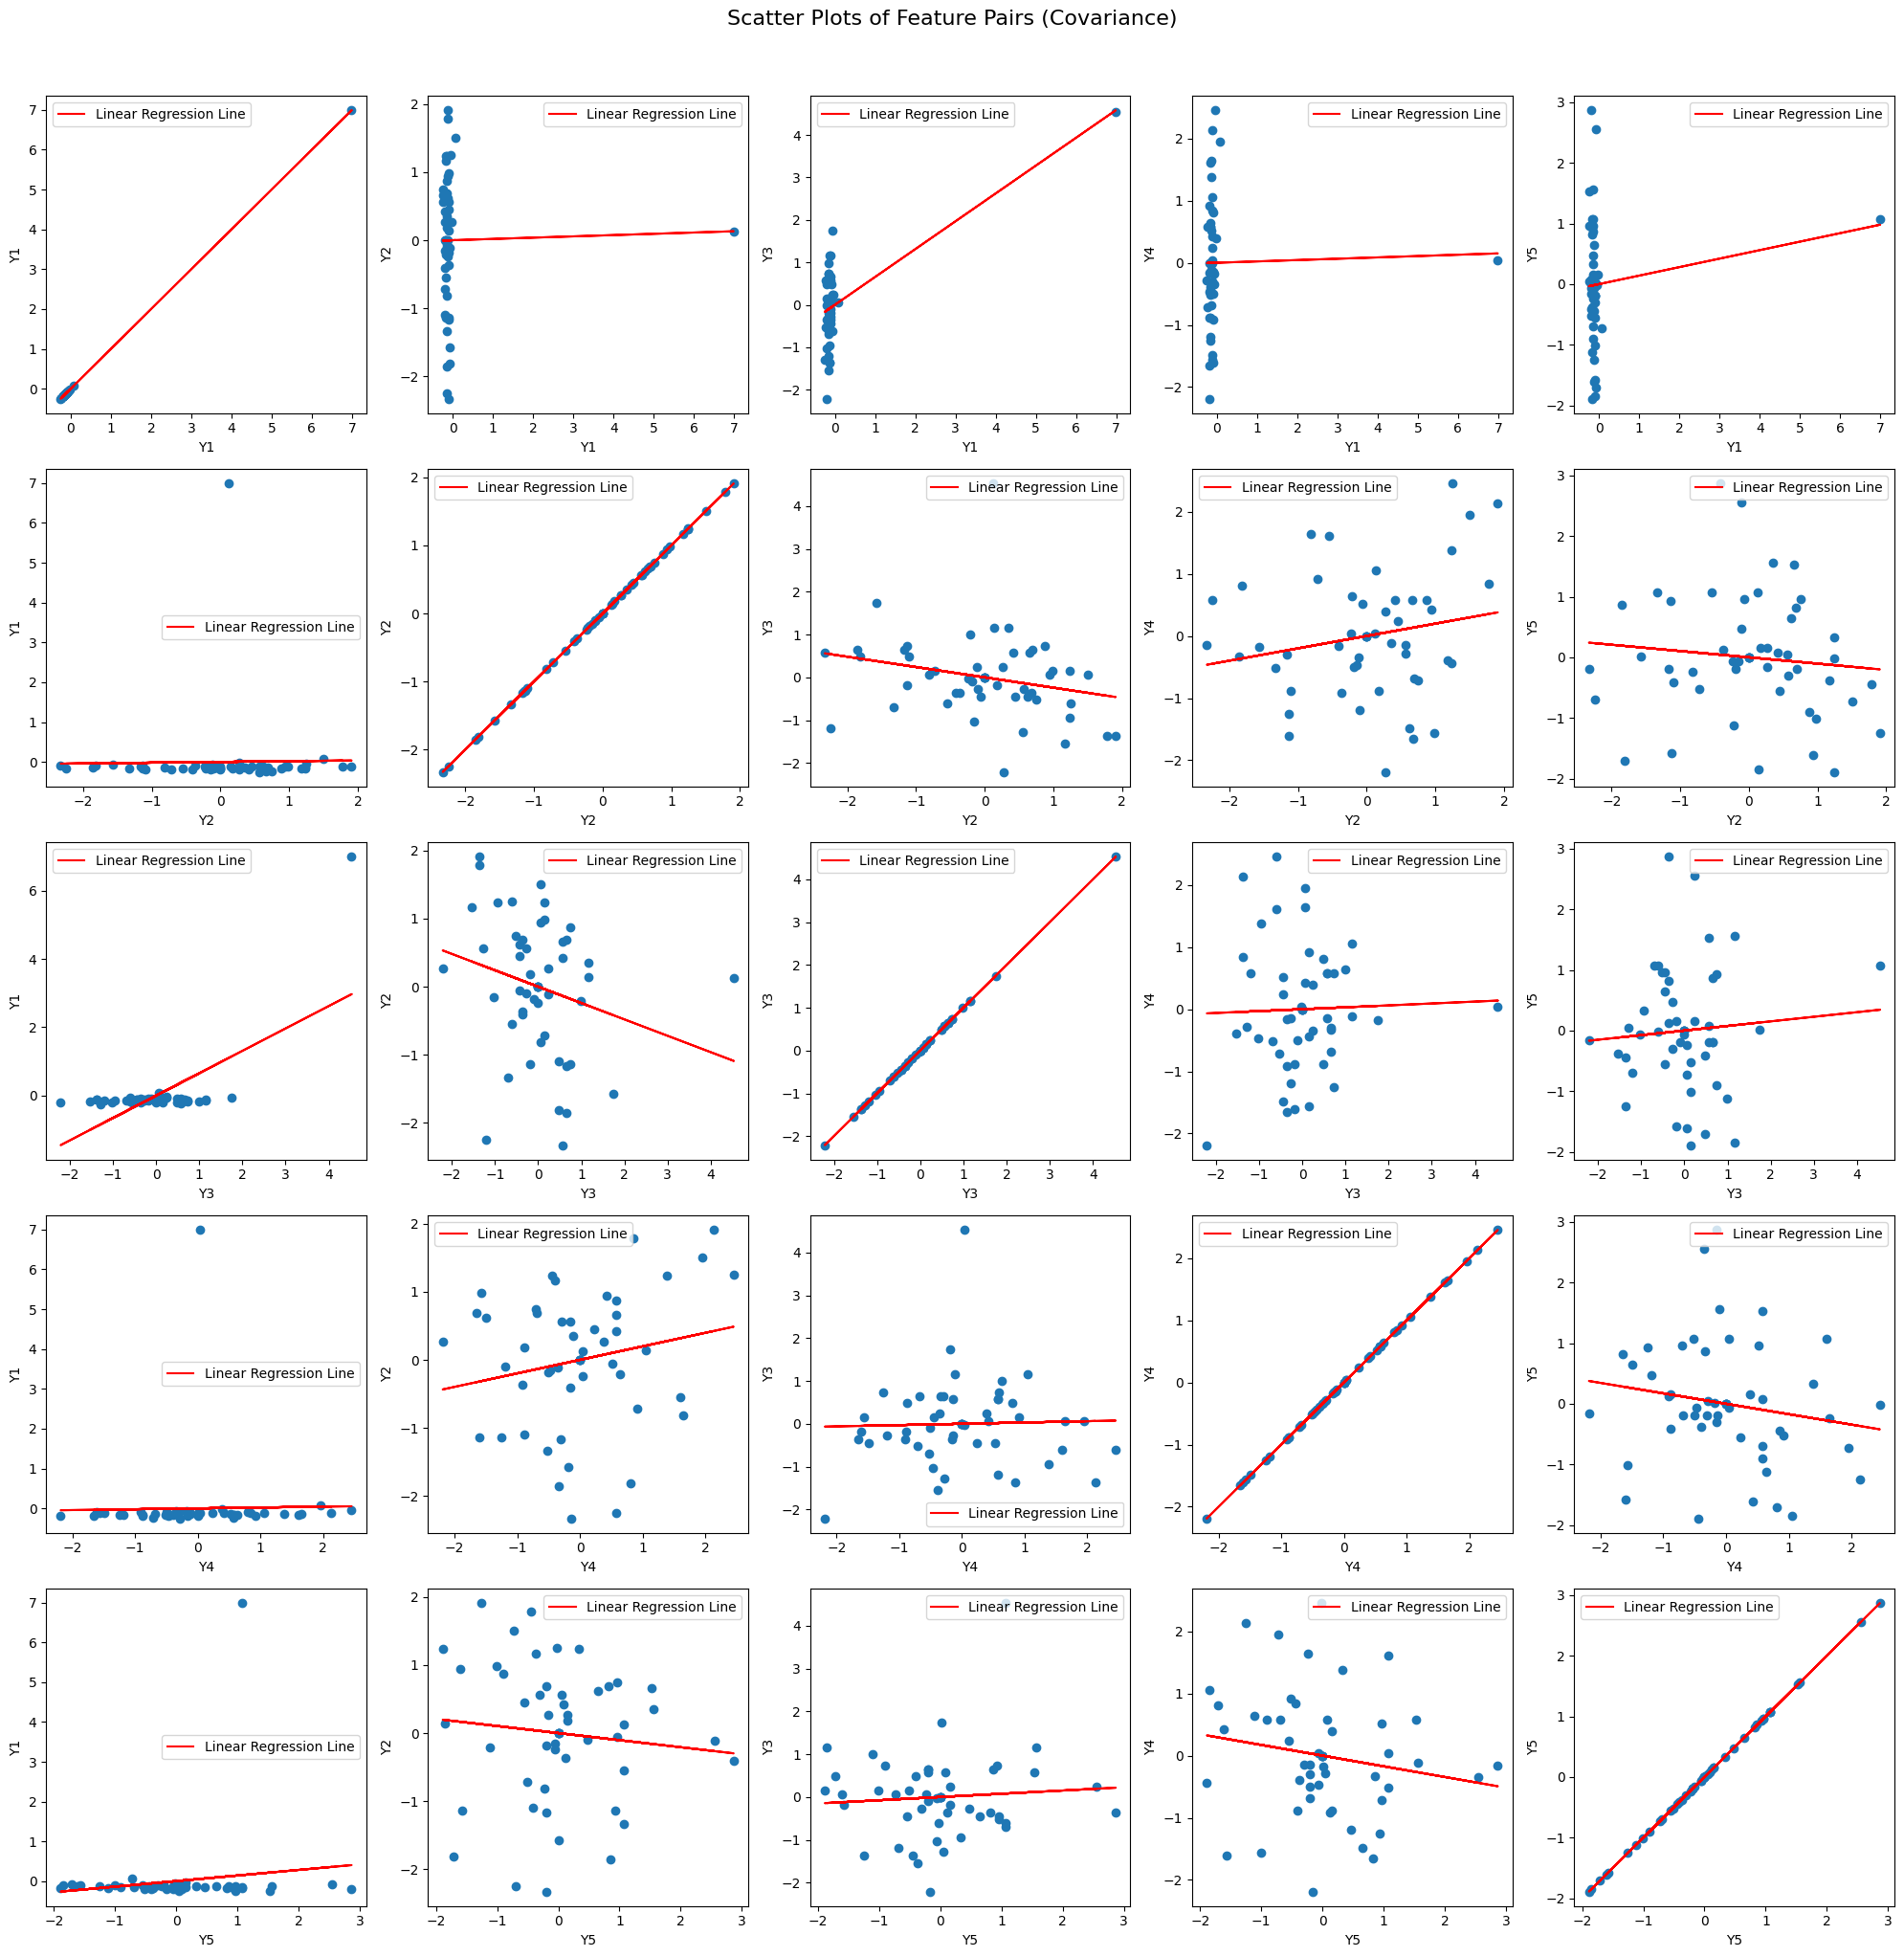

In [23]:
# Create subplots for all combinations of features
len_features = len(features_columns)
fig, axes = plt.subplots(len_features, len_features, figsize=(20, 20))
fig.suptitle("Scatter Plots of Feature Pairs (Covariance)", fontsize=16, y=1.02)

# Loop over rows and columns for subplots
for i in range(len_features):
    for j in range(len_features):

        # Get the names of the features to be plotted
        axis_zero_feature = features_columns[i]
        axis_one_feature = features_columns[j]

        # Plot the scatter plot of Yi vs Yj
        axes[i, j].scatter(sample_group[axis_zero_feature], sample_group[axis_one_feature])

        # Fit a linear regression model using numpy
        X = sample_group[axis_zero_feature].values.reshape(-1, 1)
        Y = sample_group[axis_one_feature].values
        coefficients = np.polyfit(X.flatten(), Y, deg=1)  # Fit a first-degree polynomial (linear regression)

        # Calculate the predicted values using the linear regression coefficients
        Y_pred = np.polyval(coefficients, X.flatten())
        # Plot the linear regression line
        axes[i, j].plot(X, Y_pred, color='red', label='Linear Regression Line')
        axes[i, j].legend()

        # Set axis labels and subplot titles
        axes[i, j].set_xlabel(axis_zero_feature)
        axes[i, j].set_ylabel(axis_one_feature)

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

plt.show()

## **Note #3**
According to the results we can conclude the following:

${\circ}$ From the scatter plots of ${X_i}$ vs ${Y_i}$ we see a verticle behaviour, as expected due to the constant value of each ${X_i}$. This verticle line tells us that there is no correlation between ${Y_i}$ and its corresponding ${X_i}$.
<br>
${\circ}$ According to the statistics summary (**before the preprocessing**) that we presented earlier, we know that ${σ_{Y3} \le σ_{Y5} \le σ_{Y4} \le σ_{Y2}}$.
<br>
Again, according to the previous explenation, there is no correlation between ${X_i}$ and ${Y_i}$, but if we still wanted to estimate some feature according to a given independent variable, the estimation would be better for the features with the lowest standard deviation, ${Y3}$ and ${Y5}$ in our case.
<br>
${\circ}$ From the scatter plots between the different features we can see that ${Y_1}$ has no correlation with the other features, while the other features $({Y_i}$ for ${i \neq 1}$) are correlated with each other. Actually, we **can** define some approximate linear relation between them, while the intensity of the correlation will be varying according to the spread of the points in the plot. In this case, the correlation is weak.


### The meaning of ${Y_1}$
According to the results so far, ${Y_1}$ can have the following interpretations:

1) A measure of some outcome of interest that is being studied independently (for example it might represent the number of times a particular event or condition was observed during a series of tests)

2) A control feature used to adjust for certain effects when analyzing the relationships between the other features and variables

# **Section 4- Data Exploration**
In this section we will explore the 'new_devices.csv' data, which we defined as **new sample group**.

Our main goal here will be to find the probability of each deviice to belong to the sample group dataset.

Because at the begginning we preproccesed our data (standardization), we must first do the same for the new sample group. Note that here we will normalize the mean and variance according to the statistical properties of the **sample group** data.

In [41]:
# Loading the new sample group data
csv_sample_group_path = r'/content/gdrive/MyDrive/Pulsenmore/new_devices.csv'
new_sample_group = pd.read_csv(csv_sample_group_path)

In [42]:
new_sample_group.head()

,ID,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5
0,1,1557,18,16.15,14,13.55,12,11.28,9,8.33
1,2,1497,18,18.31,14,13.44,12,11.65,9,8.34
2,3,1495,18,17.48,14,13.39,12,11.52,9,8.03


In [44]:
print(f"New sample group shape: {new_sample_group.shape} \n")
print(f"Initial statistic properties of new sample group \n {new_sample_group.describe()}")

New sample group shape: (3, 10) 

Initial statistic properties of new sample group 
         ID           Y1    X2         Y2    X3         Y3    X4         Y4  \
count  3.0     3.000000   3.0   3.000000   3.0   3.000000   3.0   3.000000   
mean   2.0  1516.333333  18.0  17.313333  14.0  13.460000  12.0  11.483333   
std    1.0    35.232561   0.0   1.089602   0.0   0.081854   0.0   0.187705   
min    1.0  1495.000000  18.0  16.150000  14.0  13.390000  12.0  11.280000   
25%    1.5  1496.000000  18.0  16.815000  14.0  13.415000  12.0  11.400000   
50%    2.0  1497.000000  18.0  17.480000  14.0  13.440000  12.0  11.520000   
75%    2.5  1527.000000  18.0  17.895000  14.0  13.495000  12.0  11.585000   
max    3.0  1557.000000  18.0  18.310000  14.0  13.550000  12.0  11.650000   

        X5        Y5  
count  3.0  3.000000  
mean   9.0  8.233333  
std    0.0  0.176163  
min    9.0  8.030000  
25%    9.0  8.180000  
50%    9.0  8.330000  
75%    9.0  8.335000  
max    9.0  8.340000  


## **Scaling the 'new sample group' according to 'sample group' statistics**

In [45]:
# Scale the features of new sample group with the statistical properties of sample group
scaled_features = (new_sample_group[features_columns] - sample_group_features_means) / sample_group_features_stds

# Combine the scaled features with the X columns
new_sample_group = pd.concat([scaled_features, new_sample_group[variables_columns]], axis=1)

In [47]:
new_sample_group.head()

,Y1,Y2,Y3,Y4,Y5,X2,X3,X4,X5
0,0.728995,-0.311123,0.822884,-0.334703,-0.057742,18,14,12,9
1,-0.111519,0.215561,-0.103981,-0.020252,-0.022497,18,14,12,9
2,-0.139536,0.013177,-0.525283,-0.130735,-1.115092,18,14,12,9


In [46]:
print(f"Statistic properties of new sample group after scaling \n {new_sample_group.describe()}")

Statistic properties of new sample group after scaling 
              Y1        Y2        Y3        Y4        Y5    X2    X3    X4   X5
count  3.000000  3.000000  3.000000  3.000000  3.000000   3.0   3.0   3.0  3.0
mean   0.159313 -0.027462  0.064540 -0.161897 -0.398443  18.0  14.0  12.0  9.0
std    0.493558  0.265683  0.689702  0.159525  0.620886   0.0   0.0   0.0  0.0
min   -0.139536 -0.311123 -0.525283 -0.334703 -1.115092  18.0  14.0  12.0  9.0
25%   -0.125528 -0.148973 -0.314632 -0.232719 -0.586417  18.0  14.0  12.0  9.0
50%   -0.111519  0.013177 -0.103981 -0.130735 -0.057742  18.0  14.0  12.0  9.0
75%    0.308738  0.114369  0.359452 -0.075493 -0.040119  18.0  14.0  12.0  9.0
max    0.728995  0.215561  0.822884 -0.020252 -0.022497  18.0  14.0  12.0  9.0


## **Plots to visualize the 'new sample group'**

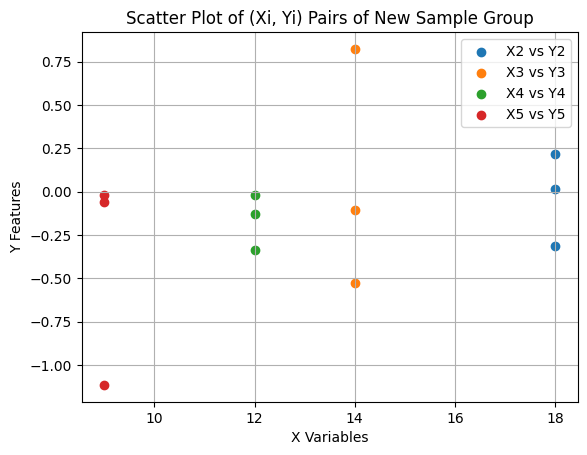

In [48]:
# Scatter plot for features with corresponding variables
for x_col, y_col in zip(variables_columns, features_columns[1:]):
    plt.scatter(new_sample_group[x_col], new_sample_group[y_col], label=f'{x_col} vs {y_col}')

plt.xlabel('X Variables')
plt.ylabel('Y Features')
plt.legend()
plt.title('Scatter Plot of (Xi, Yi) Pairs of New Sample Group')
plt.grid(True)

plt.show()

## **Calculating the probability of belonging to 'sample group'**
We will calculate the probability of the 'new sample group' devices to belong to the 'sample group' dataset according to the following process:  

${\circ}$ We will calculate the euclidian distance of the features and variables of new devices in respect to each device from the sample group
<br>
${\circ}$ For each new device, we will calculate the ratio between the distances we got to the sum of all distances.
<br>
${\circ}$ For each new device ${i}$, we will define the probability of being a device j from the sampale group as ${P = 1-\frac{d(i,j)}{\sum_jd(i,j)}}$, i.e the more close the new device to some device from sample group, the probability is higher.

In [55]:
# Calculate the Euclidean distance between each new device and the devices in the original sample group
distances = np.linalg.norm(sample_group.values - new_sample_group.values[:, np.newaxis,:], axis=2)
total_distances = np.sum(distances, axis=1, keepdims=True)

# Create an array that contains the sorted indexes of devices from 'sample group' based on the distances values
sorted_indexes_per_distance = np.argsort(distances, axis=1)

probabilities = 1 - distances / total_distances

for new_device_ind in range(new_sample_group.shape[0]):
  closest_device_from_sample_group = sorted_indexes_per_distance[new_device_ind][0]
  probability_of_closest_device = probabilities[new_device_ind][0]
  print(f"New device {new_device_ind} has probability of {probability_of_closest_device:.4f} to belonging to the sample group")

New device 0 has probability of 0.9822 to belonging to the sample group
New device 1 has probability of 0.9883 to belonging to the sample group
New device 2 has probability of 0.9892 to belonging to the sample group


## **Note #4**
As seems from the results we got, we can rank the new devices, according to their probabilities of belonging to the sample group, in the following order:

1) Device 2
<br>
2) Device 1
<br>
3) Device 0

# **Section 5- Suggest a New Testing Method**
As mentioned in the beginning, according to the description of this problem, we can categorize it as aregression problem. That mean we can define some regression model (mathematical relation between variables and features) based on our sample group.

Then, we can use this model to predict features values for new devices variables and compare the predicted result with their real corresponding features according to some threshold we will choose.


## **The Mathematical Model**

In [61]:
# generate